In [50]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from functools import reduce
from operator import add
import matplotlib.pyplot as plt
import seaborn

import src.pipe as pipe
%load_ext autoreload
%autoreload 1
%aimport src.pipe

plt.style.use('fivethirtyeight')
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df

In [19]:
df.head()

,artist,album_id,album_type,total_tracks,release_date,release_date_precision,disc_number,duration_ms,explicit,title,...,bb_artist,bb_title,date,peakPos,weeks,on_billboard,norm_sentiment,rel_sentiment,release_year,release_month
2,"""Weird Al"" Yankovic",36jlZKG1sNZQA2HbWdYveV,album,12,2014-07-15,day,1,223120,False,Word Crimes,...,"""Weird Al"" Yankovic",Word Crimes,2014-08-02,39.0,2.0,True,0.500000,0.039434,2014,7.0
3,*NSYNC,20RMokVwJ2wjQ0s8FOdOFC,album,12,2000-03-21,day,1,200400,False,Bye Bye Bye,...,'N Sync,Bye Bye Bye,2000-01-29,42.0,23.0,True,-0.138889,-0.010101,2000,3.0
4,*NSYNC,7zBue2Vuzg4Z3ncRXaIkJg,album,13,2001-07-24,day,1,292000,False,Gone,...,'N Sync,Gone,2001-09-22,63.0,24.0,True,0.148148,0.006079,2001,7.0
5,*NSYNC,20RMokVwJ2wjQ0s8FOdOFC,album,12,2000-03-21,day,1,192426,False,It's Gonna Be Me,...,'N Sync,It's Gonna Be Me,2000-05-06,82.0,25.0,True,0.107143,0.008403,2000,3.0
6,*NSYNC,7zBue2Vuzg4Z3ncRXaIkJg,album,13,2001-07-24,day,1,238426,False,Pop,...,'N Sync,Pop,2001-06-02,29.0,15.0,True,-0.080000,-0.003650,2001,7.0


## EDA

### Todo:
1. categorical handling for mode, time sig, key, album type?
2. match spotify to genius by trackname and artist
3. breakout month and year?


In [26]:
labels = np.array(reduce(add, df.label.apply(lambda s:s.split('/'))))
labels = np.array(list(map(lambda s: s.strip().lower(), labels)))
np.unique(labels).shape

(942,)

In [ ]:
for l in np.unique(labels):
    print(l)

In [46]:
df.columns

Index(['artist', 'album_id', 'album_type', 'total_tracks', 'release_date',
       'release_date_precision', 'disc_number', 'duration_ms', 'explicit',
       'title', 'popularity', 'track_number', 'danceability', 'energy',
       'acousticness', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'response_artist', 'response_title', 'wordcount', 'label',
       'album_popularity', 'on_billboard', 'norm_sentiment', 'rel_sentiment'],
      dtype='object')

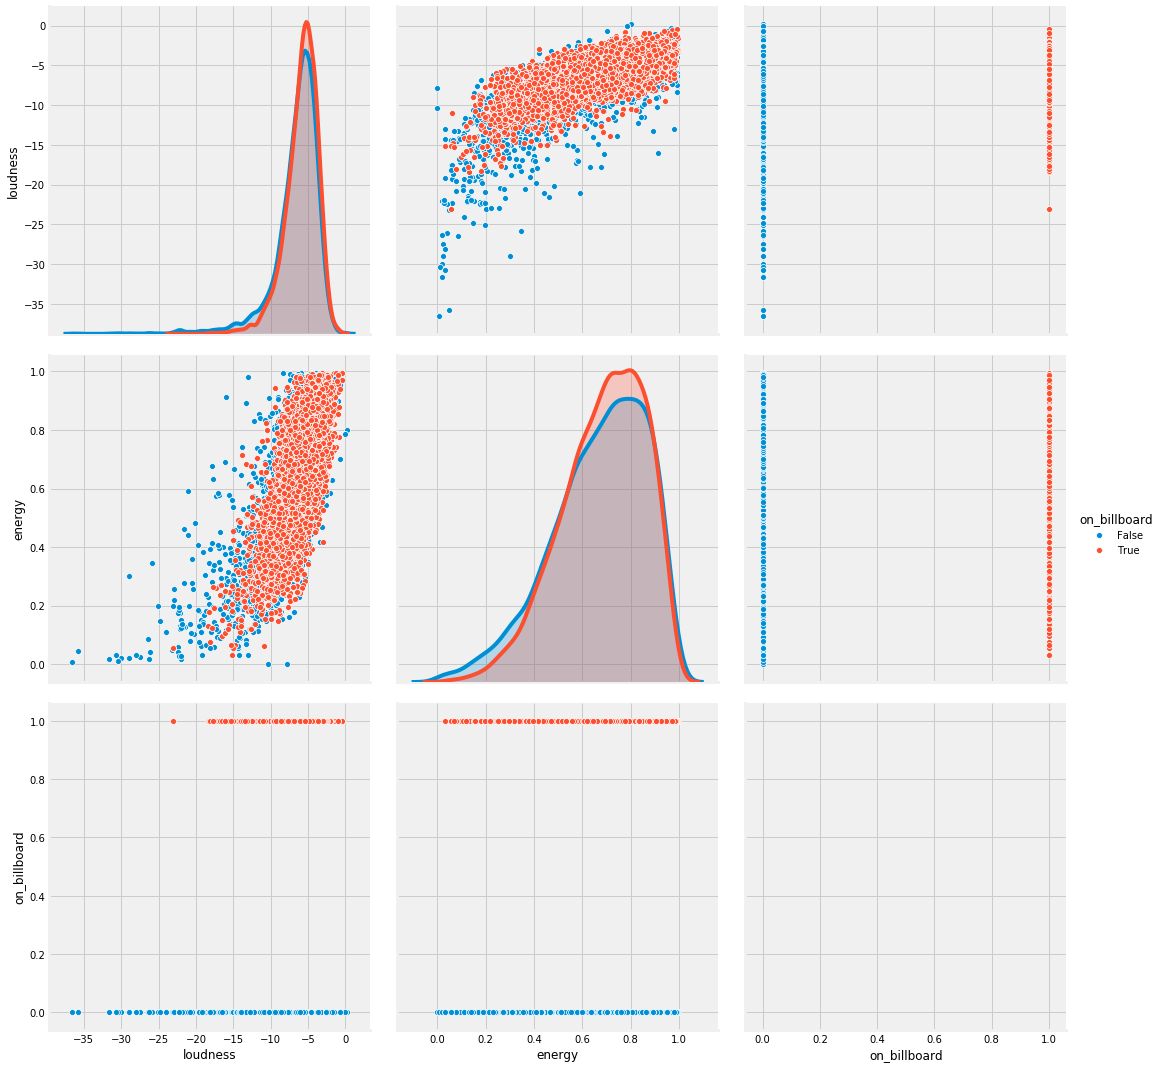

In [48]:
# seaborn.pairplot(df[['loudness', 'energy', 'on_billboard']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'norm_sentiment', 'rel_sentiment', 'popularity']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'wordcount', 'speechiness']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'norm_sentiment', 'rel_sentiment', 'valence']], hue='on_billboard', height=5)

# seaborn.pairplot(df[['on_billboard', 'popularity', 'album_popularity']], hue='on_billboard', height=5)

In [54]:
np.sum(df.release_date_precision=='year')

799

In [55]:
np.sum(df.release_date_precision=='day')

12702

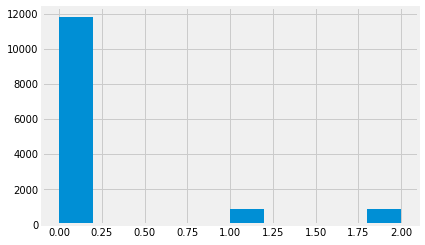

In [127]:
# df.album_type.apply(lambda t:{'album':0, 'single':1, 'compilation':2}[t]).hist()

# df.total_tracks.hist(bins=50)

# df.disc_number.hist()

# ((df.duration_ms)/60000).hist(bins=100)

# df.explicit.astype(int).hist()

# df.popularity.hist(bins=30)

# df.track_number.hist(bins=100)

# df.danceability.hist(bins=30)

# df.energy.hist(bins=30)

# df.acousticness.hist(bins=30)

# df.key.hist()

# df.loudness.hist(bins=30)

# df['mode'].hist()

# df.speechiness.hist(bins=30)

# df.instrumentalness.hist(bins=30)

# df.liveness.hist(bins=30)

# df.valence.hist(bins=30)

# df.tempo.hist(bins=30)

# df.time_signature.hist()

# df.wordcount.hist(bins=30)

# df.album_popularity.hist(bins=30)

# df.on_billboard.astype(int).hist()

# df.norm_sentiment.hist(bins=30)

# (df.rel_sentiment).hist(bins=30)

# df.release_year.hist(bins=30)

# df.release_month.hist(bins=12)



### Label transform

In [11]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()

In [12]:
bbd.dummyize_record_label()
df = bbd.df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Columns: 311 entries, total_tracks to label_zone4
dtypes: float64(12), int64(7), uint8(292)
memory usage: 5.7 MB


In [13]:
tdf = df.copy()


In [19]:
tdf.columns[52]

'lt_12_label'

In [20]:
labelcounts = [np.sum(tdf[column]) for column in tdf.columns[53:]]

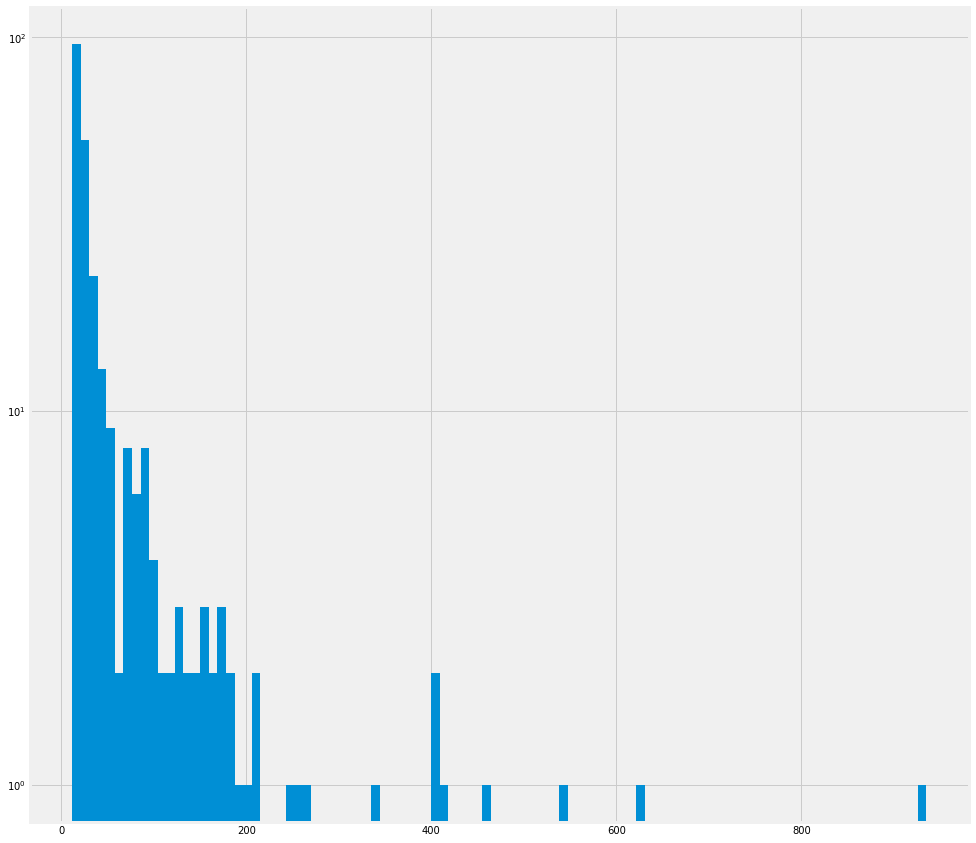

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
ax.hist(labelcounts, bins=100)
ax.set_yscale('log')

Text(0, 0.5, 'No. Record labels')

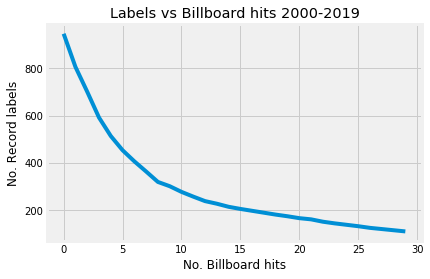

In [164]:
x = np.arange(0, 30)
y = np.array([np.sum([np.sum(tdf[column])>i for column in tdf.columns[54:]]) for i in x])

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Labels vs Billboard hits 2000-2019')
ax.set_xlabel('No. Billboard hits')
ax.set_ylabel('No. Record labels')

In [165]:
tdf.columns[55]

'label_12tonemusic'

In [166]:
n = 12
lt_label=f'lt_{n}_label'
tdf.insert(53, lt_label, 0)

In [167]:
for column in tdf.columns[55:]:
    if np.sum(tdf[column]) < 12:
        tdf[lt_label] = tdf[lt_label]+tdf[column]
        tdf.drop(columns=[column], inplace=True)

In [168]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Columns: 313 entries, index to label_zone4
dtypes: bool(2), float64(11), int64(267), object(1), uint8(32)
memory usage: 29.2+ MB


In [179]:
np.sum(tdf.lt_12_label>0)

2492

In [213]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 56 columns):
index                     13501 non-null int64
total_tracks              13501 non-null int64
disc_number               13501 non-null int64
duration_ms               13501 non-null int64
explicit                  13501 non-null uint8
popularity                13501 non-null int64
track_number              13501 non-null int64
danceability              13501 non-null float64
energy                    13501 non-null float64
acousticness              13501 non-null float64
loudness                  13501 non-null float64
mode                      13501 non-null int64
speechiness               13501 non-null float64
instrumentalness          13501 non-null float64
liveness                  13501 non-null float64
valence                   13501 non-null float64
tempo                     13501 non-null float64
wordcount                 13501 non-null float64
label                    

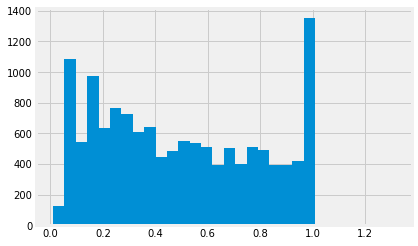

In [214]:
df.track_placement.hist(bins=30)

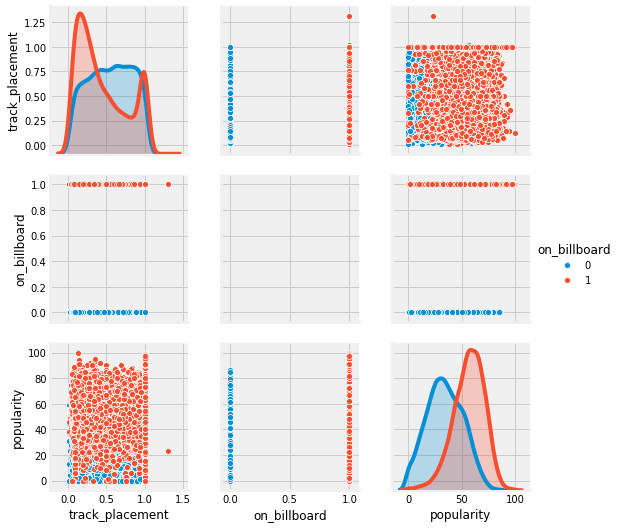

In [210]:
seaborn.pairplot(df[['track_placement', 'on_billboard', 'popularity']], hue='on_billboard')

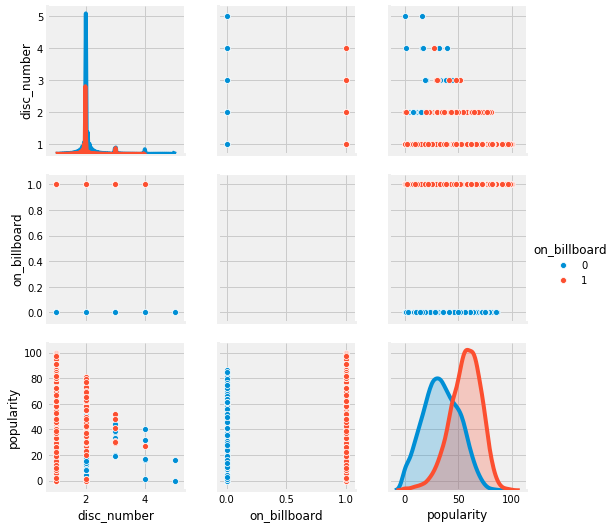

In [218]:
seaborn.pairplot(df[['disc_number', 'on_billboard', 'popularity']], hue='on_billboard')

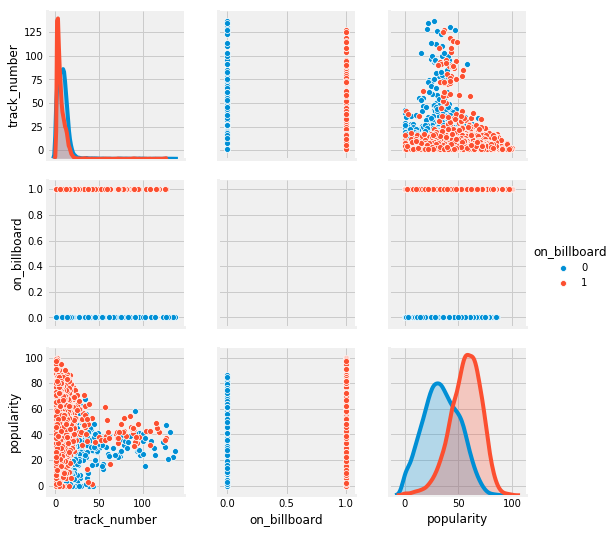

In [219]:
seaborn.pairplot(df[['track_number', 'on_billboard', 'popularity']], hue='on_billboard')

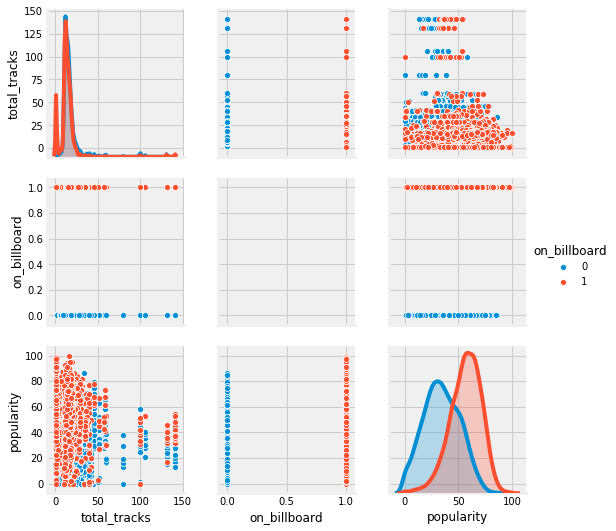

In [220]:
seaborn.pairplot(df[['total_tracks', 'on_billboard', 'popularity']], hue='on_billboard')

### Transform labels to counts of fits instead

In [22]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()
df = bbd.df

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [43]:
defd['19recordings']

7

In [59]:
bbd = pipe.BillboardData() 
bbd.transform_for_models()

In [60]:
bbd.transform_label_to_labelhitcount()
df = bbd.df

In [ ]:
df.label

Getting yearcounts

In [67]:
df1 = pipe.BillboardData().load_spotify_billboard_data()

In [69]:
df1['year'] = pd.to_datetime(df1.release_date, format='%Y-%m-%d').apply(lambda d:d.year)

In [76]:
d = df1[df1.year>=2000].groupby('year').count()['obj_id'].to_dict()

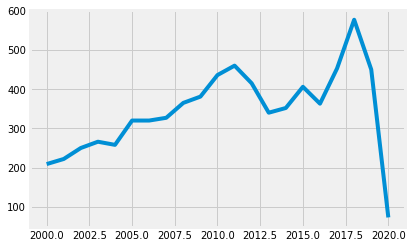

In [78]:
plt.plot(d.keys(), d.values())

### Plotting how values change over year

In [181]:
bbd = pipe.BillboardData() 
df1 = bbd.df.copy()
bbd.transform_for_models()
df2 = bbd.df.copy()
bbd.transform_label_to_labelhitcount()
df3 = bbd.df.copy()

In [182]:
bbdf = bbd.load_spotify_billboard_data()

In [184]:
bbdf.shape

(7384, 26)

In [268]:
style={
    'color':'black',
    'ecolor':'red',
    'elinewidth':1,
}
def plotbyyear(df, col, axx=None):
    gb = df[['release_year', col]].groupby('release_year')
    mu = gb.mean()
    s = gb.std()
    if not axx:
        _, axx = plt.subplots()
    axx.errorbar(mu.index, mu.values, yerr=s.values, **style)
    axx.set_title(f'{col} vs Release Year')
    axx.set_xlabel('Year')
    axx.set_ylabel(col)
def plotbymonth(df, col, axx=None):
    gb = df[['month', col]].groupby('month')
    mu = gb.mean()
    s = gb.std()
    if not axx:
        _, axx = plt.subplots()
    axx.set_title(f'{col} vs Release Month')
    axx.set_xlabel('Year')
    axx.set_ylabel(col)
    axx.errorbar(mu.index, mu.values, yerr=s.values, **style)

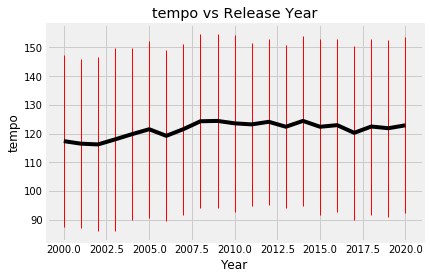

In [269]:
plotbyyear(df3[df3.release_year>=2000], 'tempo', None)

In [234]:
plotbymonth(df1[df1.release_date>='1999'], 'tempo', None)

KeyError: "['release_month'] not in index"

In [235]:
monthdf = df1.copy()

In [236]:
monthdf['month'] = pd.to_datetime(monthdf.release_date).apply(lambda d: d.month)

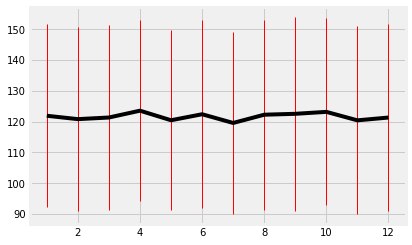

In [261]:
plotbymonth(monthdf[monthdf.release_date>='1999'], 'tempo', None)

In [241]:
ax.errorbar()

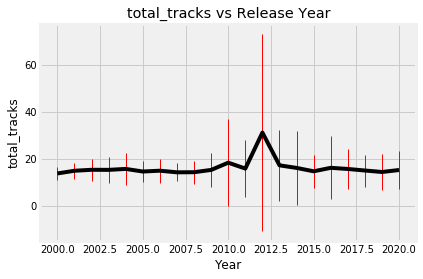

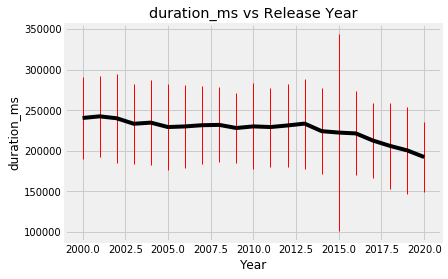

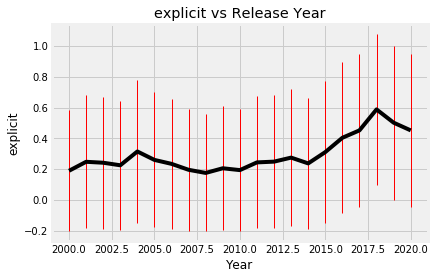

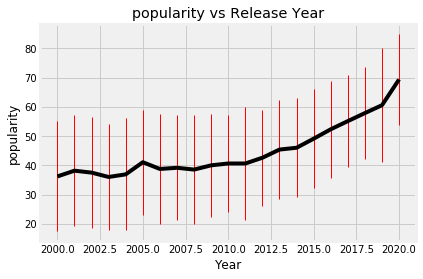

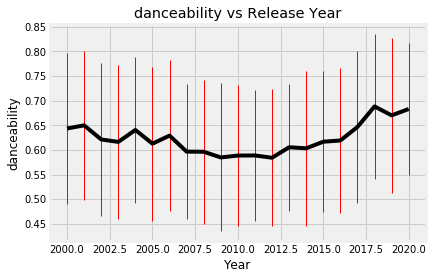

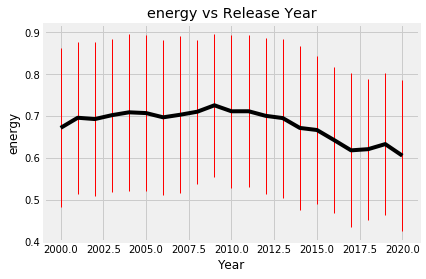

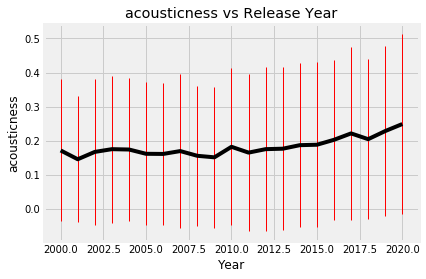

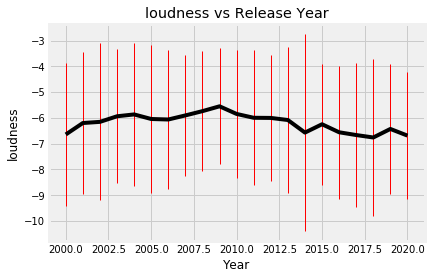

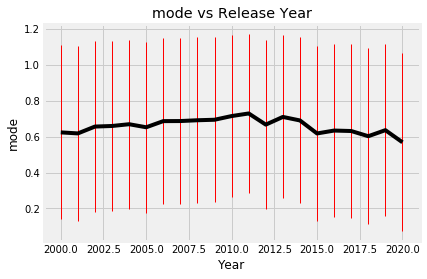

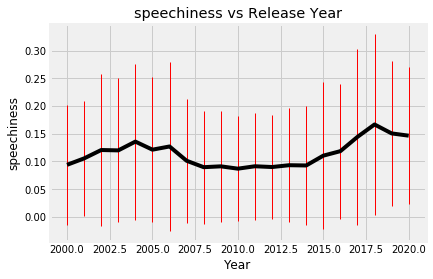

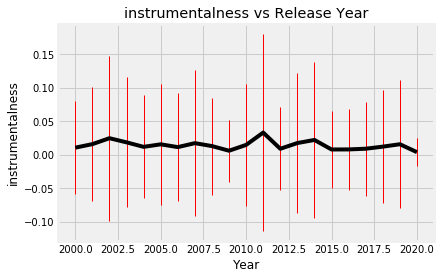

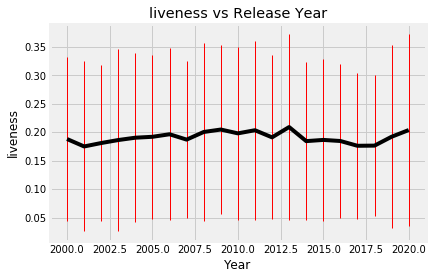

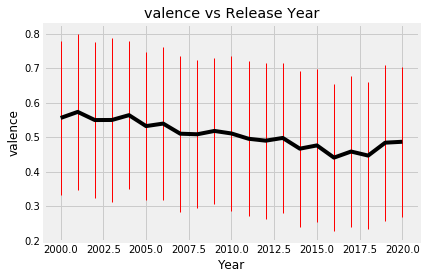

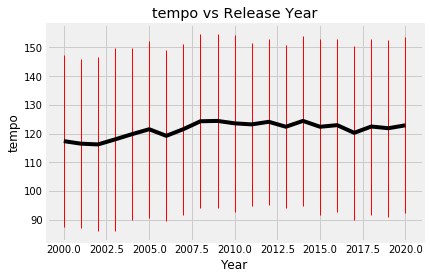

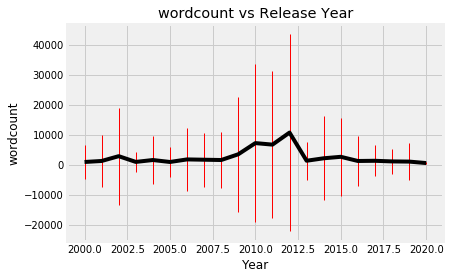

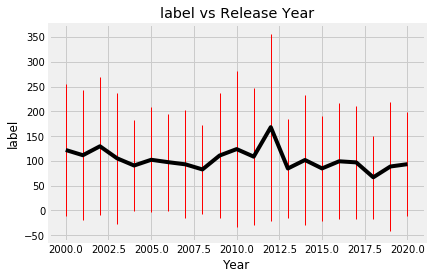

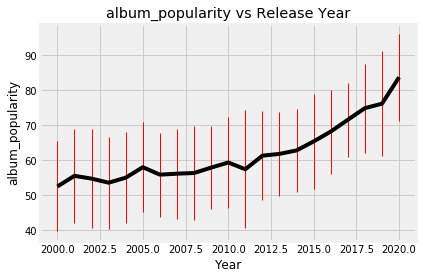

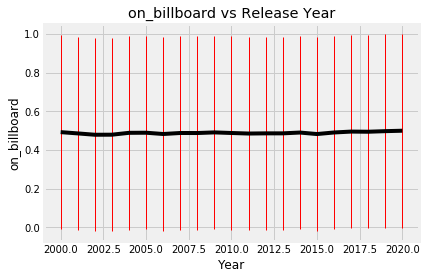

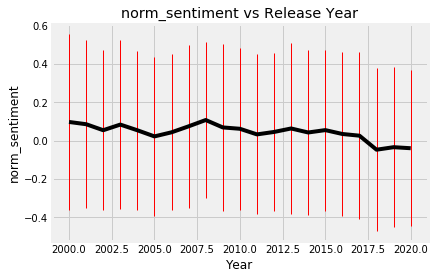

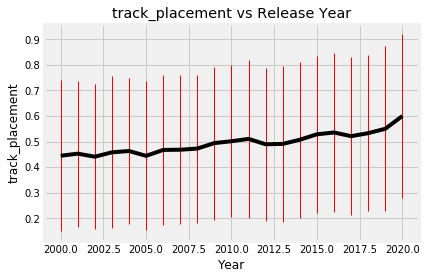

In [273]:
for c in df3.columns[:21]:
    if c != 'release_year':
        plotbyyear(df3[df3.release_year>=2000], c, None)

In [272]:
df3.columns[:21]

Index(['total_tracks', 'duration_ms', 'explicit', 'popularity', 'danceability',
       'energy', 'acousticness', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'wordcount',
       'label', 'album_popularity', 'on_billboard', 'norm_sentiment',
       'release_year', 'track_placement'],
      dtype='object')

In [274]:
import joypy
from matplotlib import cm

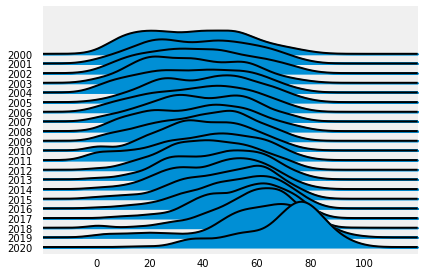

In [288]:
joystyle={
    'overlap':1,
    'fade':None,
    'linewidth':2,
}
fig, axes = joypy.joyplot(df3[['release_year', 'popularity']][df3.release_year>=2000], 
                          by='release_year', column='popularity', **joystyle
)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:270: UserWarning: The data contains a group with a single distinct value (1) having infinite probability density. Consider using a different visualization.
  "Consider using a different visualization.".format(val))
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:50: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  ax.set_xlim([min(x_range), max(x_range)])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:270: UserWarning: The data contains a group with a single distinct value (1) having infinite probability density. Consider using a different visualization.
  "Consider using a different visualization.".format(val))
/home/ubuntu/anaconda3/lib/python3.7/site-packages/joypy/joyplot.py:50: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.


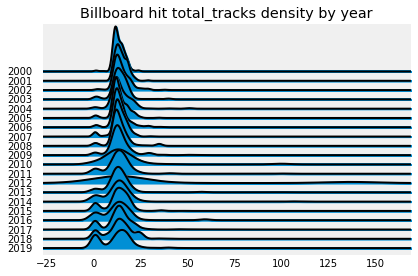

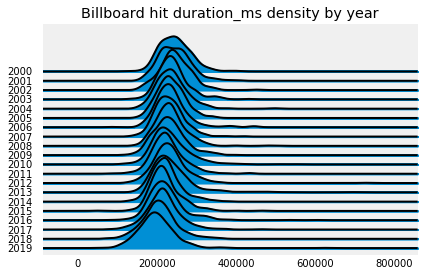

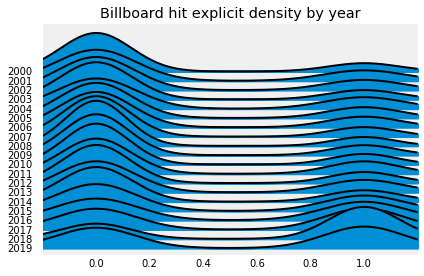

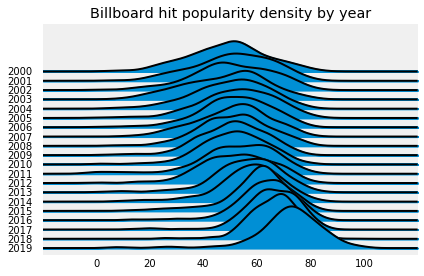

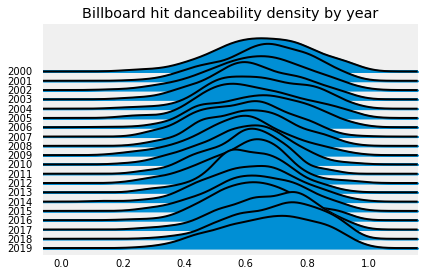

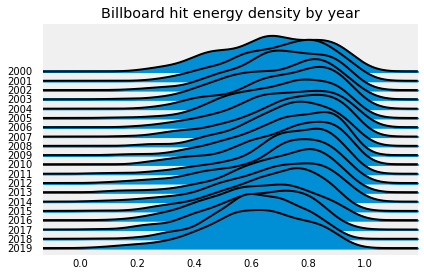

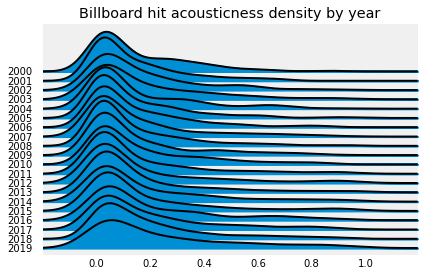

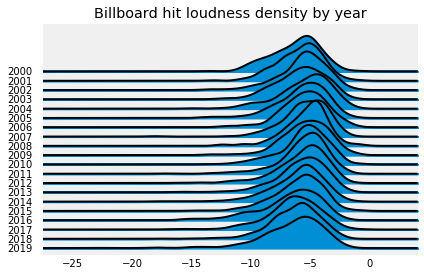

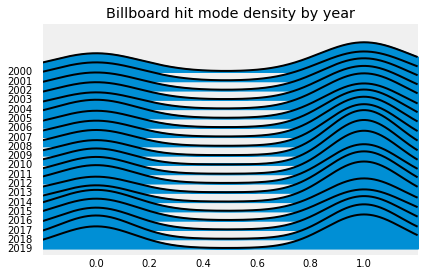

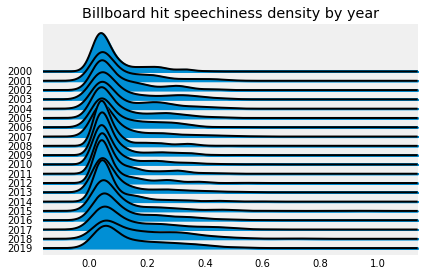

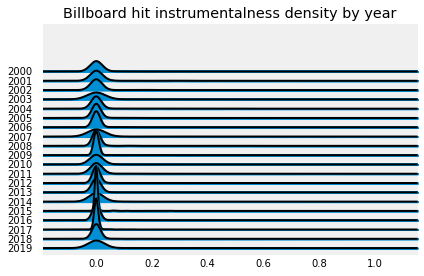

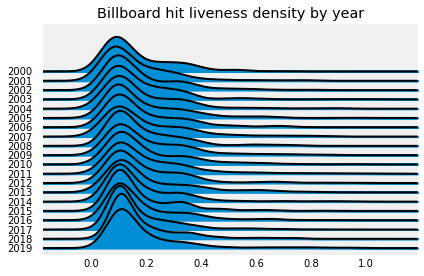

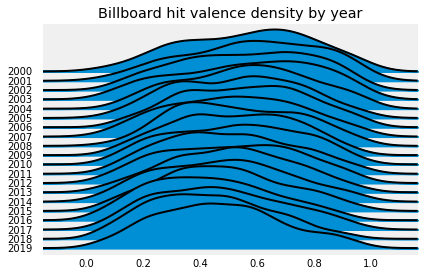

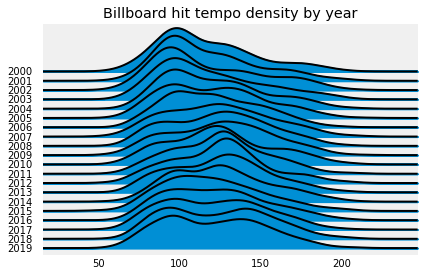

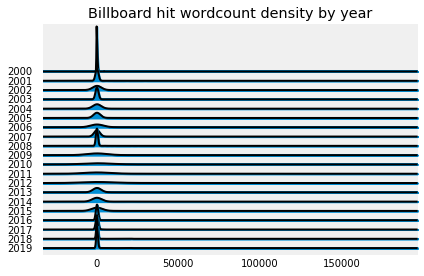

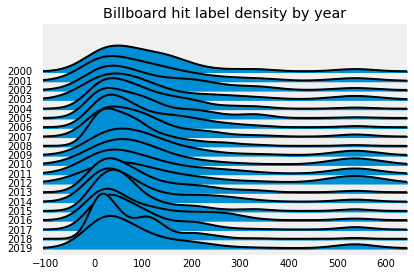

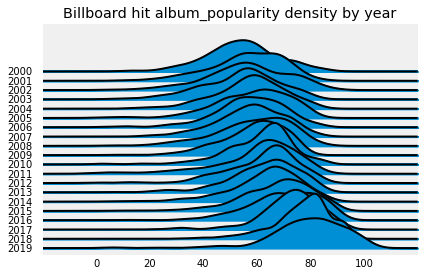

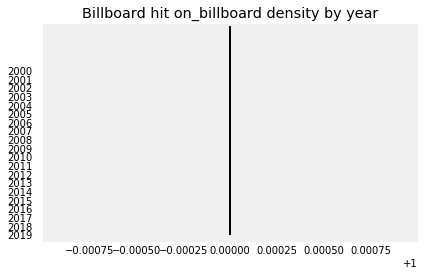

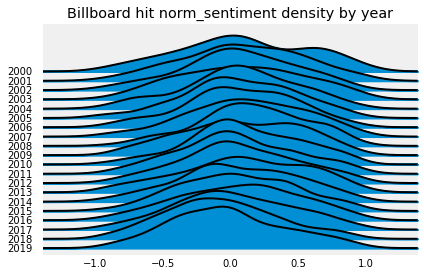

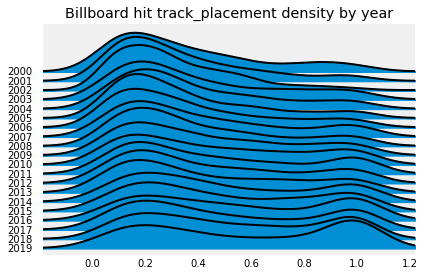

In [291]:
joystyle={
    'overlap':1,
    'fade':None,
    'linewidth':2,
}
for col in df3.columns[:21]:
    if col == 'release_year':
        continue
    _ = joypy.joyplot(df3[['release_year', col]][
            (df3.release_year>=2000)&(df3.release_year<2020)&(df3.on_billboard==1)], 
        by='release_year', column=col, **joystyle, title=f'Billboard hit {col} density by year'
    )

In [300]:
df1['energy'].dtype ==float

True